In [1]:
# importing libraries
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

In [2]:
# reading the excel file
df = pd.read_csv('crab.csv')
#print first 5 rows 
df.head()

,color,spine,width,satell,weight,class
0,3,3,28.3,8,3050,1
1,4,3,22.5,0,1550,0
2,2,1,26.0,9,2300,1
3,4,3,24.8,0,2100,0
4,4,3,26.0,4,2600,1


In [3]:
df[['width','weight']].describe(include='all').round(2)

,width,weight
count,173.00,173.00
mean,26.30,2437.19
std,2.11,577.03
min,21.00,1200.00
25%,24.90,2000.00
50%,26.10,2350.00
75%,27.70,2850.00
max,33.50,5200.00


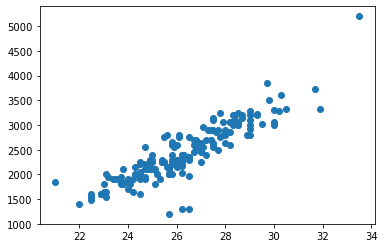

In [3]:
plt.scatter(df['width'],df['weight'])
plt.show()

<AxesSubplot:>

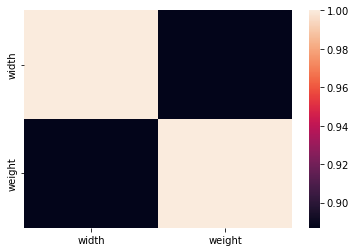

In [4]:
sb.heatmap(df[['width','weight']].corr())

In [5]:
print("Color Unique Values : ",df['color'].unique())
# if you do not use drop_first it become a One Hot Encoding which is different
dumval_color=pd.get_dummies(df['color'],drop_first=True,prefix='color')
dumval_color

Color Unique Values :  [3 4 2 5]


,color_3,color_4,color_5
0,1,0,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
168,0,1,0
169,0,1,0
170,0,0,0
171,0,0,1


In [6]:
print("Spine Unique Values : ",df['spine'].unique())
# if you do not use drop_first it become a One Hot Encoding which is different
dumval_spine=pd.get_dummies(df['spine'],drop_first=True,prefix='spine')
dumval_spine

Spine Unique Values :  [3 1 2]


,spine_2,spine_3
0,0,1
1,0,1
2,0,0
3,0,1
4,0,1
...,...,...
168,0,1
169,0,1
170,0,0
171,0,1


In [9]:
df2=pd.concat([dumval_color, dumval_spine,df['width']], axis=1)
df2

,color_3,color_4,color_5,spine_2,spine_3,width
0,1,0,0,0,1,28.3
1,0,1,0,0,1,22.5
2,0,0,0,0,0,26.0
3,0,1,0,0,1,24.8
4,0,1,0,0,1,26.0
...,...,...,...,...,...,...
168,0,1,0,0,1,26.1
169,0,1,0,0,1,29.0
170,0,0,0,0,0,28.0
171,0,0,1,0,1,27.0


In [10]:
X = df2.to_numpy()
y = df['class'].to_numpy()

In [11]:
#Fit the model to the data
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.586227
         Iterations 6


In [12]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  173
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.1015
Time:                        17:15:17   Log-Likelihood:                -101.42
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 0.0003491
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.2030      0.896     -1.343      0.179      -2.958       0.553
x2            -1.7847      0.927     -1.925      0.054      -3.601       0.032
x3            -2.9521      0.991     -2.979      0.003      -4.894      -1.010
x4            -0.8325      0.661     -1.259      0.208      -2.128       0.463
x5             0.1907      0.472      0.404      0.686      -0.735       1.116
x6             0.0805      0.032      2.540      0.011       0.018       0.143
==============================================================================
"""

In [14]:
log_reg.aic # Get AIC of the model

214.83461860670266

In [15]:
log_reg.predict(X)

array([0.77983962, 0.55387443, 0.89011574, 0.59902214, 0.62197573,
       0.71149752, 0.89398925, 0.34754309, 0.66905209, 0.61437953,
       0.58932194, 0.74337514, 0.77845512, 0.10959059, 0.70867462,
       0.89847815, 0.7340581 , 0.78935685, 0.31560797, 0.76715561,
       0.45789749, 0.76476506, 0.6473362 , 0.63512423, 0.33502917,
       0.34223679, 0.7853154 , 0.72178289, 0.36615541, 0.7293195 ,
       0.91352357, 0.90606889, 0.50808348, 0.70366632, 0.7201643 ,
       0.29849211, 0.75842137, 0.76858973, 0.29346254, 0.77426432,
       0.64990703, 0.89090024, 0.90279765, 0.77043873, 0.62442375,
       0.67508448, 0.77845512, 0.73090492, 0.78258996, 0.77467988,
       0.31560797, 0.77143942, 0.90065879, 0.69640896, 0.70366632,
       0.77983962, 0.76426883, 0.62575175, 0.73764831, 0.32967327,
       0.64254954, 0.59321081, 0.59572403, 0.7464329 , 0.77566747,
       0.80242366, 0.78935685, 0.74946649, 0.71690992, 0.74946649,
       0.61437953, 0.56379216, 0.56379216, 0.73718762, 0.58737

In [16]:
#statsmodel gives us probabilities , convert these to a binary class
np.where(log_reg.predict(X) > 0.5, 1, 0)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

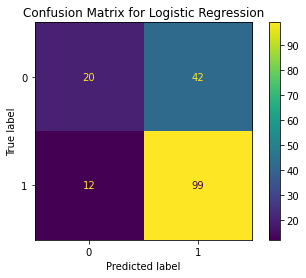

In [17]:
cm = confusion_matrix(y, np.where(log_reg.predict(X) > 0.5, 1, 0), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

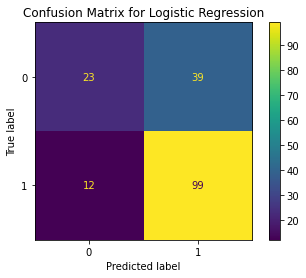

In [23]:
cm = confusion_matrix(y, np.where(log_reg.predict(X) > 0.55, 1, 0), labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()